# IMPORTING LIBRARIES

In [117]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# DATA PRE- PROCESSING

## TRAINNING IMAGE PRE- PROCESSING

In [120]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## VALIDATION IMAGE PRE- PROCESSING

In [122]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [123]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [124]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 73.5   73.    77.5 ]
   [ 76.25  75.5   80.25]
   [ 74.25  73.5   78.25]
   ...
   [ 26.25  18.75  19.25]
   [ 25.25  18.25  17.25]
   [ 24.25  17.25  16.25]]

  [[148.75 147.75 152.75]
   [150.25 149.25 154.25]
   [148.   147.   152.  ]
   ...
   [ 46.75  37.75  38.75]
   [ 43.25  35.25  33.25]
   [ 39.5   31.5   29.5 ]]

  [[147.75 146.75 151.75]
   [147.25 146.25 151.25]
   [147.75 146.75 151.75]
   ...
   [ 48.25  39.25  40.25]
   [ 44.    36.    34.  ]
   [ 39.75  31.75  29.75]]

  ...

  [[136.   139.   144.  ]
   [136.   139.   144.  ]
   [136.   139.   144.  ]
   ...
   [102.25 108.25 106.25]
   [101.75 107.75 105.75]
   [103.5  109.5  107.5 ]]

  [[136.   139.   144.  ]
   [136.   139.   144.  ]
   [136.   139.   144.  ]
   ...
   [101.75 107.75 105.75]
   [103.5  109.5  107.5 ]
   [103.   109.   107.  ]]

  [[136.   139.   144.  ]
   [136.   139.   144.  ]
   [136.   139.   144.  ]
   ...
   [100.   106.   104.  ]
   [103.5  109.5  107.5 ]
   [100.75 106.75 10

## BUILDING THE MODEL

In [126]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [127]:
model = Sequential()

## BUILDING CONVOLUTION LAYER

In [129]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [130]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [131]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [132]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [133]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [134]:
model.add(Dropout(0.25))  #to prevent from overfitting 25%

In [135]:
model.add(Flatten())

In [136]:
model.add(Dense(units=1500, activation='relu'))

In [137]:
model.add(Dropout(0.4))  #to prevent from overfitting

In [138]:
#output layer

model.add(Dense(units=38, activation='softmax'))

# COMPILING MODEL

In [140]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING MODEL

In [143]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1108s 502ms/step - accuracy: 0.3933 - loss: 2.1370 - val_accuracy: 0.8318 - val_loss: 0.5330
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1160s 528ms/step - accuracy: 0.8431 - loss: 0.5015 - val_accuracy: 0.9171 - val_loss: 0.2507
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1143s 520ms/step - accuracy: 0.9083 - loss: 0.2916 - val_accuracy: 0.9369 - val_loss: 0.1977
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1083s 493ms/step - accuracy: 0.9345 - loss: 0.1972 - val_accuracy: 0.9414 - val_loss: 0.1843
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1086s 494ms/step - accuracy: 0.9538 - loss: 0.1397 - val_accuracy: 0.9583 - val_loss: 0.1321
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1107s 504ms/step - accuracy: 0.9653 - loss: 0.1051 - val_accuracy: 0.9612 - val_loss: 0.1255
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1113s 506ms/step - accuracy: 0.9703 - loss: 0.0946 - val_accuracy: 0.9618 - val_loss: 0.1206
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1078s 491ms/s

In [144]:
## MODEL EVALUATION

In [145]:
# model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 268s 122ms/step - accuracy: 0.9939 - loss: 0.0213
Training accuracy: 0.9945231080055237


In [147]:
# model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 68s 123ms/step - accuracy: 0.9703 - loss: 0.0981
Validation accuracy: 0.9706920385360718


## SAVING MODEL

In [156]:
model.save("trained_model.keras")

In [157]:
training_history.history   # Return Dictionary of history

{'accuracy': [0.5999004244804382,
  0.8654953837394714,
  0.9162671566009521,
  0.9397823214530945,
  0.955274224281311,
  0.964179515838623,
  0.9723308682441711,
  0.9762714505195618,
  0.9788604974746704,
  0.981022834777832],
 'loss': [1.351891040802002,
  0.42638251185417175,
  0.26058337092399597,
  0.18237733840942383,
  0.13590499758720398,
  0.10773288458585739,
  0.08839333802461624,
  0.07270245254039764,
  0.06513749063014984,
  0.0583147294819355],
 'val_accuracy': [0.831777811050415,
  0.9171409010887146,
  0.9368882179260254,
  0.9413840174674988,
  0.958285927772522,
  0.9611882567405701,
  0.9617573618888855,
  0.9618711471557617,
  0.9647166132926941,
  0.9706920385360718],
 'val_loss': [0.5330289602279663,
  0.25065046548843384,
  0.19769106805324554,
  0.18429283797740936,
  0.13206717371940613,
  0.12546060979366302,
  0.12056262046098709,
  0.13296401500701904,
  0.11604669690132141,
  0.09831973910331726]}

In [151]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [152]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## ACCURACY VISULALIZATION

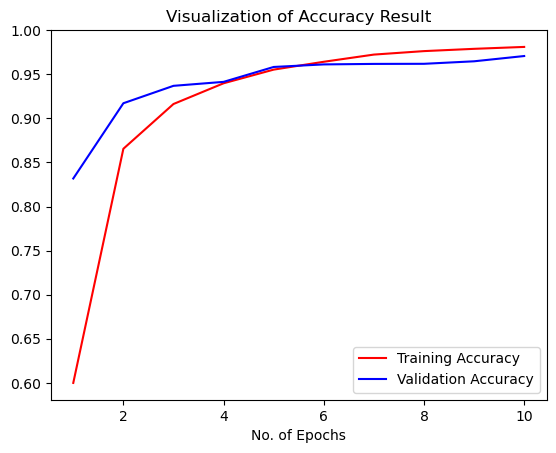

In [154]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()